# Problem Statement :
A walmart retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. 
#  Problem Objective:
Predicting future sales for a company is one of the most important aspects of strategic planning.
Using the data and make prediction models to forecast the sales for 12 months/years.
# Choosing the Algorithm for the Project:
perform dertailed EDA & RandomForestRegressor and xgboostRegressor identifies the best performing stores across the country

# Dataset Information:

The walmart.csv contains 6435 rows and 8 columns.
# Feature Name  :   Description
1. Store        :   Store number
2. Date         :   Week of Sales
3. Weekly_Sales :   Sales for the given store in that week
4. Holiday_Flag :   If it is a holiday week
5. Temperature  :   Temperature on the day of the sale
6. Fuel_Price   :   Cost of the fuel in the region
7. CPI          :   Consumer Price Index
8. Unemployment :   Unemployment Rate

# Importing required libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Importing  Dataset:

In [2]:
df = pd.read_csv(r"/kaggle/input/walmart-sales-data/Walmart DataSet.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
# to check the data types.
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [4]:
# to check the presence of null values.
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Information of the Data:

In [5]:
# Basic information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# Date column is in object type so converting 'date' column to a datetime type.
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [7]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

# Splitting Date column:

Splitting Date column into week, month and year for future calculations:

In [8]:
df['day'] =df['Date'].dt.day
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

In [9]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [10]:
# To get Month wise average weekly sales:
df.groupby('month')['Weekly_Sales'].mean()

month
1     9.238846e+05
2     1.053200e+06
3     1.013309e+06
4     1.026762e+06
5     1.031714e+06
6     1.064325e+06
7     1.031748e+06
8     1.048017e+06
9     9.893353e+05
10    9.996321e+05
11    1.147266e+06
12    1.281864e+06
Name: Weekly_Sales, dtype: float64

# Visualizing Month wise average Weekly sales:

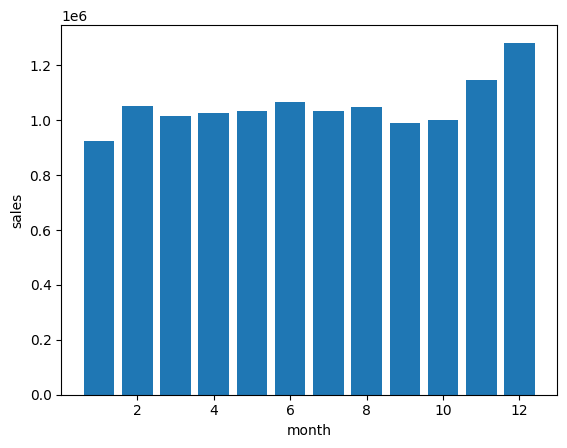

In [11]:
# to see the best month for sales
month_by_sales=df.groupby('month')['Weekly_Sales'].mean()
plt.bar(month_by_sales.index,month_by_sales.values)
plt.xlabel('month')
plt.ylabel('sales')
plt.show()

sales looks higher in the month of december

In [12]:
# Year wise average weekly sales:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    1.059670e+06
2011    1.046239e+06
2012    1.033660e+06
Name: Weekly_Sales, dtype: float64

# Year wise Average weekly sales:

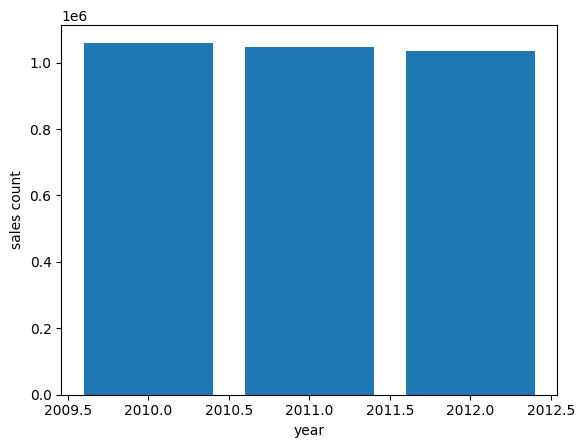

In [13]:
# to see the best year for sales
year_by_sales=df.groupby('year')['Weekly_Sales'].mean()
plt.bar(year_by_sales.index,year_by_sales.values)
plt.xlabel('year')
plt.ylabel('sales count')
plt.show()

Average Yearly sales are looks almost same there is not much difference in it.

# Description:

In [14]:
# description of the data/ to get statistical insights:
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,15.678322,6.447552,2010.965035
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,1.000000,2010.000000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,8.000000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,16.000000,6.000000,2011.000000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,23.000000,9.000000,2012.000000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,31.000000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,8.755780,3.238308,0.797019


# Heatmap:

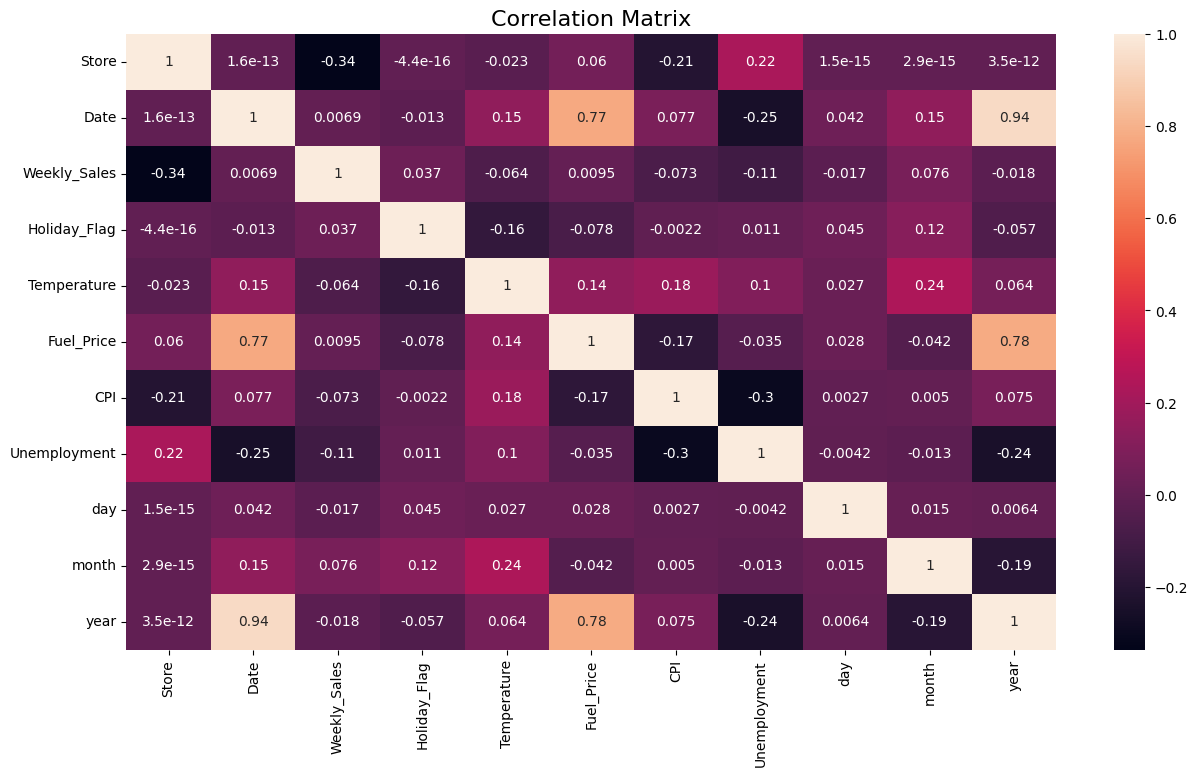

In [15]:
# Heatmap, Correlation between features of dataset:
plt.figure(figsize=(15,8))
corr = df.corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

# Box plot:

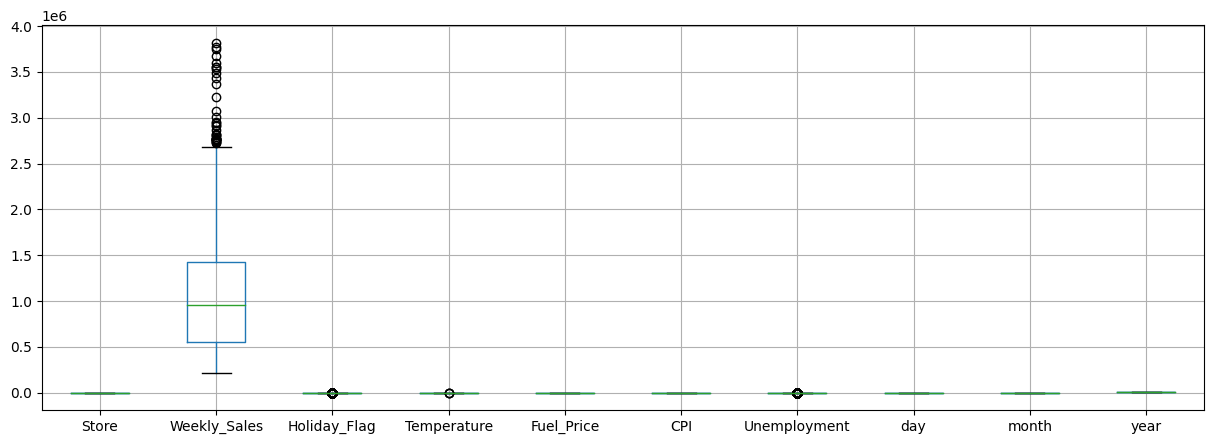

In [16]:
# Box plot visualization for checking outliers:
df.boxplot(figsize=(15,5))
plt.show()

In [17]:
Q1 = df.Weekly_Sales.quantile(0.25)
Q3 = df.Weekly_Sales.quantile(0.75)
IQR = Q3-Q1
df = df[(df.Weekly_Sales >= Q1-1.5*IQR) & (df.Weekly_Sales<=Q3+1.5*IQR)]

Q1 = df.Unemployment.quantile(0.25)
Q3 = df.Unemployment.quantile(0.75)
IQR = Q3-Q1
df = df[(df.Unemployment >= Q1-1.5*IQR) & (df.Unemployment<=Q3+1.5*IQR)]

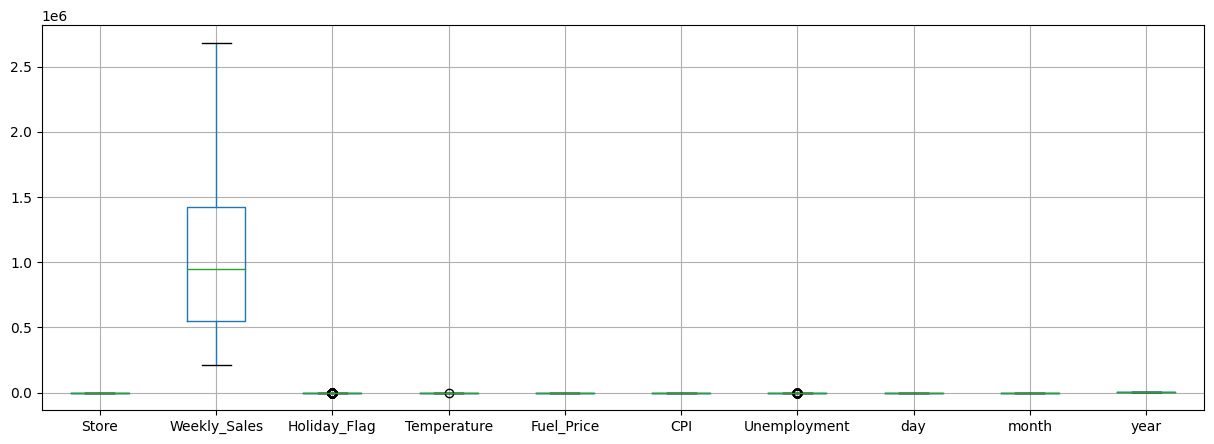

In [18]:
df.boxplot(figsize=(15,5))
plt.show()

In [19]:
df['Holiday_Flag'].value_counts()

Holiday_Flag
0    5511
1     409
Name: count, dtype: int64

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

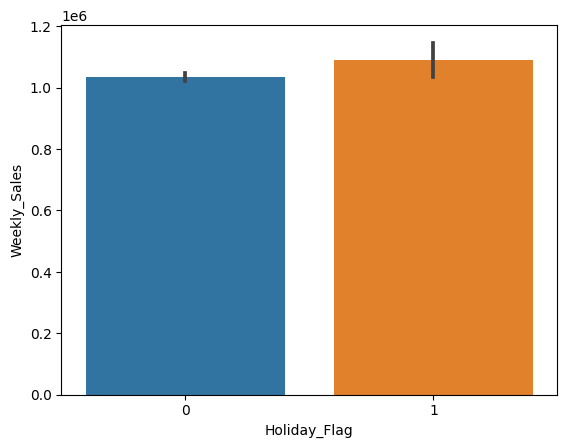

In [20]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)

# Store wide average weekly sales visualization:

In [21]:
absweekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()
absweekly_sales.index

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45],
      dtype='int64', name='Store')

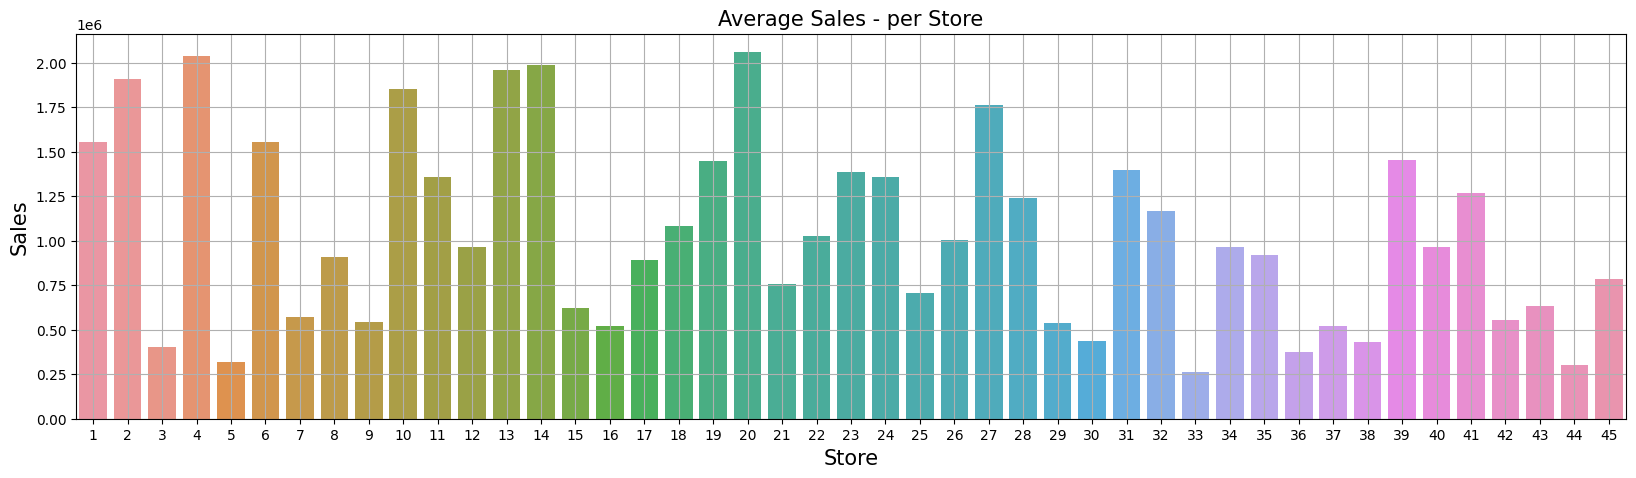

In [22]:
weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()
plt.figure(figsize=(20,5))
plt.style.use('default')
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.grid()
plt.title('Average Sales - per Store', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.xlabel('Store', fontsize=15)
plt.show()

In [23]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [24]:
df=df.drop(columns=['Date'])
#df

# Model Building: 


# Linear Regression for predicting Weekly_Sales:

Declaring independent and dependent variables as x and y.

In [25]:
x = df.drop(['Weekly_Sales'], axis=1)
y = df['Weekly_Sales']

# Scaling Data:
Standardization transforms the data to have a mean of 0 and a standard deviation of 1. 

In [26]:
sc = StandardScaler()
x = sc.fit_transform(x)

# Splitting Data:

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80,random_state=0) 
l_model=LinearRegression()
l_model.fit(x_train, y_train)
predictions=l_model.predict(x_test)
r2_lr = r2_score(y_test, predictions)

In [28]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions)) 
print("R2" , metrics.explained_variance_score(y_test, predictions))

MAE:  429973.6341337775
MSE:  269841220634.84427
R2 0.14141505806501586


# DecisionTreeRegressor Model:

In [29]:
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train, y_train)
pred_dt = model_dt.predict(x_test)
r2_dt = r2_score(y_test, pred_dt)
print("DecisionTreeRegressor:",r2_dt)

DecisionTreeRegressor: 0.9391881282662218


In [30]:
print("MAE" , metrics.mean_absolute_error(y_test, pred_dt))
print("MSE" , metrics.mean_squared_error(y_test, pred_dt))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, pred_dt)))
print("R2" , metrics.explained_variance_score(y_test, pred_dt))

MAE 71525.72563344595
MSE 19070384442.82028
RMSE 138095.56271951782
R2 0.9392028912463968


# RandomForestRegressor for predicting Weekly_Sales :

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
r2_rf = r2_score(y_test, pred_rf)
print("Random Forest Regressor R2 - ",r2_rf)

Random Forest Regressor R2 -  0.9635689556422361


In [32]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE: ', mean_absolute_error(y_test, pred_rf))
print('MSE: ', mean_squared_error(y_test, pred_rf)) 
print("R2" , metrics.explained_variance_score(y_test, pred_rf))

MAE:  58400.096004898674
MSE:  11424644592.382977
R2 0.9635727462947988


# xgboostRegressor:

In [33]:
#!pip install xgboost  
#!pip install plotly

In [34]:
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)
pred_xgbr = xgbr.predict(x_test)
r2_xgbr = r2_score(y_test, pred_xgbr)
print("XGBRegressor R2 - ",r2_xgbr)

XGBRegressor R2 -  0.9818391454394745


In [35]:
print("MAE" , metrics.mean_absolute_error(y_test, pred_xgbr))
print("MSE" , metrics.mean_squared_error(y_test, pred_xgbr))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, pred_xgbr)))
print("R2" , metrics.explained_variance_score(y_test, pred_xgbr))
     

MAE 46669.36980838261
MSE 5695178727.52789
RMSE 75466.40794106932
R2 0.9818425378560012


# Comparing Models:

In [36]:
compare = {'model':['LinearRegression','RandomForestRegressor','XGBRegressor','DecisionTreeRegressor'],
           'R2':[r2_lr,r2_rf,r2_xgbr,r2_dt]}
compare_df = pd.DataFrame(compare)
compare_df

,model,R2
0,LinearRegression,0.139527
1,RandomForestRegressor,0.963569
2,XGBRegressor,0.981839
3,DecisionTreeRegressor,0.939188


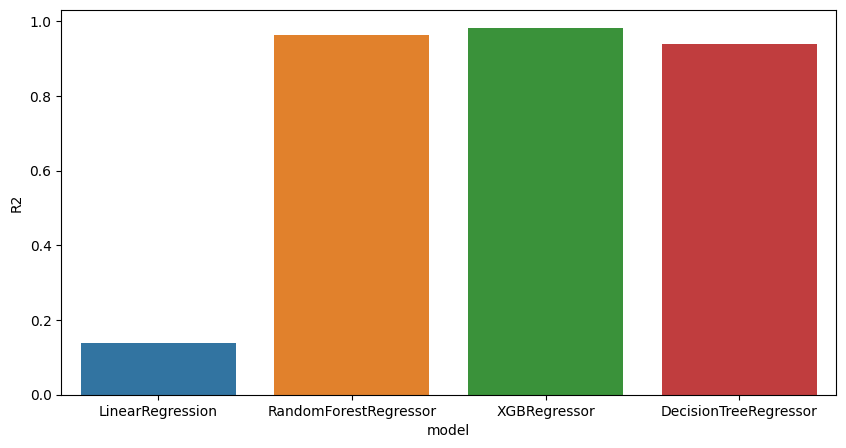

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(x='model',y='R2',data=compare_df)
plt.show()

# Inferences:

NOW WE CAN EASILY COMPARE THE BEST WAY TO TRAIN OUR MODEL AND PREDICT A BETTER AND EFFICIENT RESULTS.